¡Hola, Christian!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Christian! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

1  Abre el archivo de datos y estudia la información general 

In [1]:
# cargo librerias
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy import stats

In [2]:
# cargar el archivo en un data frame
games=pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.
</div>

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


2 Preparar Datos

In [5]:
# Reemplaza los nombres de las columnas (ponlos en minúsculas).
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# Convierte los datos en los tipos necesarios.
# primero vere cuantos datos usentes tiene cada columna
games.isnull().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [7]:
games['user_score'].value_counts(1,dropna=False)

NaN    0.400897
tbd    0.145019
7.8    0.019384
8      0.017350
8.2    0.016871
         ...   
0.2    0.000120
0.9    0.000120
1      0.000120
0      0.000060
9.7    0.000060
Name: user_score, Length: 97, dtype: float64

In [8]:
games['user_score']=games['user_score'].replace('tbd',np.nan)
# Voy a considerar  tbd como dato ausente

In [9]:
games.isnull().mean()
#hay entre 40 y 50 % de datos ausentes en critic_score , user_score y rating
# dejare asi por que son muchos datos, sera por que hubo un error al momento del ingreso en la base original
# si tengo que hace un analisis en esas columnas tomare en cuenta solo los non-null

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64

In [10]:
# cambio el tipo de datos en la columna year_of_release
games['year_of_release'] = games['year_of_release'].astype('Int64')
# cambio estos datos ausentes por 'unknow', quizas hubo error al ingrear los datos de esas columnas
games[['name','genre']] = games[['name','genre']].fillna('Unknow')




In [11]:
games[['name','genre']].isnull().sum()

name     0
genre    0
dtype: int64

In [12]:
games.isnull().mean()

name               0.000000
platform           0.000000
year_of_release    0.016093
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.545917
rating             0.404786
dtype: float64

In [13]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Dejare de momento critic_score, user_score y rating con datos ausentes y usare los non-null para el analisis estadistico.

In [14]:
# Creo una columna con las ventas totales para cada juego
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 




Paso 3. Analiza los datos

In [15]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
games_per_year = games['year_of_release'].value_counts().sort_index()
games_per_year

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

Si lo son, el crecimiento es poco desde el año 1980 hasta el año 1993 y mas significativo hasta el año 2011 y decrece  a partir del año 2012

In [16]:
# Observa cómo varían las ventas de una plataforma a otra. 
# Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
platform_sales = games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
platform_sales['total_sales'] = platform_sales.sum(axis=1)
platform_sales.sort_values('total_sales',ascending=False).head(5)

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.77
X360,602.47,270.76,12.43,85.76,971.42
PS3,393.49,330.29,80.19,135.68,939.65
Wii,496.90,262.21,69.33,79.07,907.51
DS,382.40,188.89,175.57,59.26,806.12


Se hara un diagrama de lineas de las 5 plataformas mas vendidas

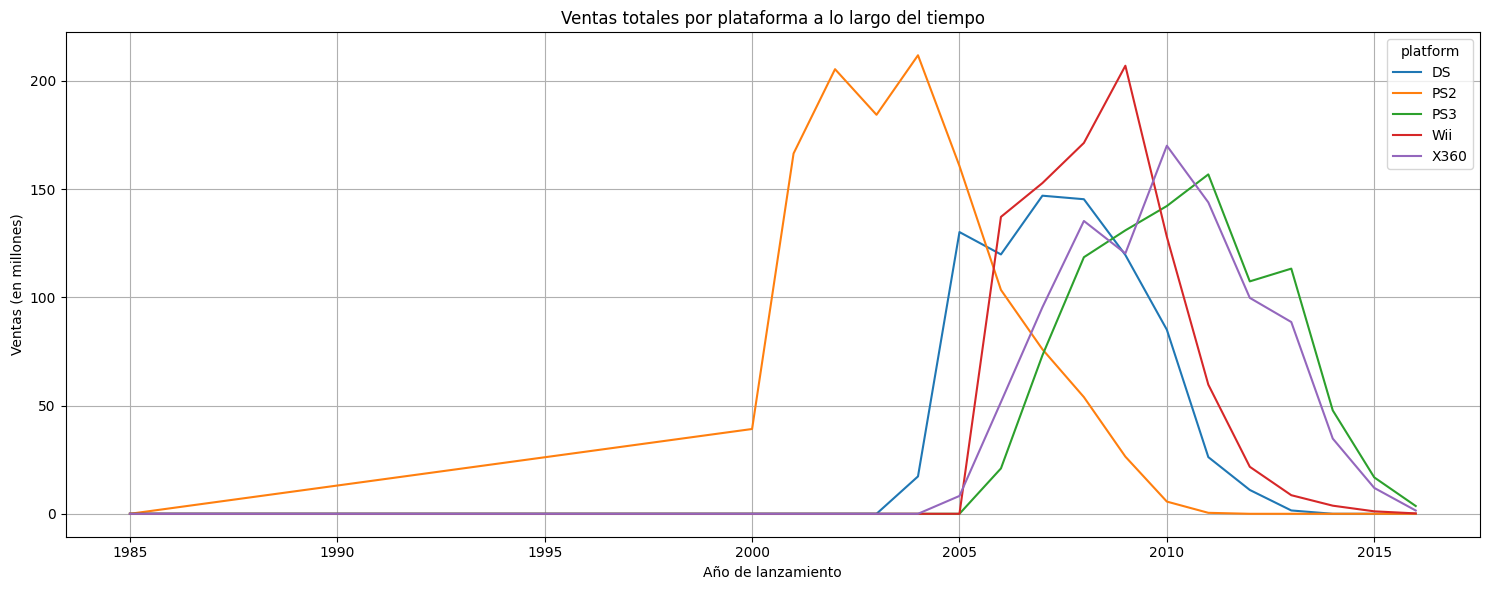

In [17]:
top_platforms = platform_sales.sort_values('total_sales',ascending=False).head(5).index

# Filtra el DataFrame original para esas plataformas
filtered = games[games['platform'].isin(top_platforms)]

# Agrupa por año y plataforma, y calcula las ventas totales
grouped = filtered.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
grouped['total_sales'] = grouped.sum(axis=1)
grouped= grouped.sort_values('total_sales',ascending=False)

# Convierte el índice múltiple a columnas normales para pivotear
grouped = grouped.reset_index()


# Pivotamos para que cada plataforma sea una columna y el índice sea el año
pivoted = grouped.pivot(index='year_of_release', columns='platform', values='total_sales')
pivoted = pivoted.fillna(0)
pivoted.plot(kind='line', figsize=(15, 6), title='Ventas totales por plataforma a lo largo del tiempo')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas (en millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo





Se ve que cuando cae las ventas del ps2 esta en aumento la ps3 por la actualizacion de la plataforma

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.


Segun mis respuestas y datos encontrados, el periodo de tiempo con datos representaticos son entre los años 1995 y 2016, por que son los años con mas juegos lanzados

In [18]:
years_df = games.loc[
    (games['year_of_release'] >= 1995) &
    (games['year_of_release'] <= 2016)
].copy()
years_df['year_of_release'].value_counts().sort_index()


1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64

Se hara el analisis de las 5 plataformas mas vendidas y se procede hacer un diagrama de cajas

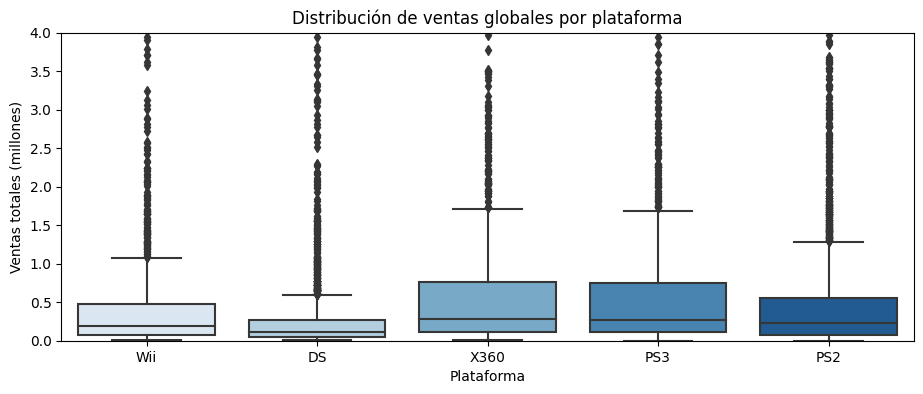

In [19]:
top5 = platform_sales.sort_values('total_sales', ascending=False).head(5).index
filtered = games[games['platform'].isin(top5)].copy()
filtered['total_sales'] = (
    filtered[['na_sales','eu_sales','jp_sales','other_sales']]
    .sum(axis=1)
)


plt.figure(figsize=(11, 4))
sns.boxplot(
    x='platform', 
    y='total_sales', 
    data=filtered, 
    palette='Blues'
)
plt.title('Distribución de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.ylim(0, 4) 
plt.show()


<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

Lo que se puede ver es que hay muchos datos sesgados, son por que hay muchos juegos que se vendieron muy bien a comparacion de la mayoria por eso tenemos muchos datos arriba. Y el diagrama esta casi en cero.

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [20]:
# elijo la plataforma PS2, filtro PS2 y quedarme solo con reseñas

ps2 = (
    games[games['platform']=='PS2']
    .dropna(subset=['critic_score','user_score','total_sales']))
ps2['user_score']=ps2['user_score'].astype(float) # Convierto a float
ps2.sort_values('total_sales',ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
84,Final Fantasy X,PS2,2001,Role-Playing,2.91,2.07,2.73,0.33,92.0,8.7,T,8.04
102,Need for Speed Underground,PS2,2003,Racing,3.27,2.83,0.08,1.02,85.0,8.6,E,7.20
113,Need for Speed Underground 2,PS2,2004,Racing,2.71,3.02,0.08,1.09,82.0,8.6,E,6.90
114,Medal of Honor: Frontline,PS2,2002,Shooter,2.93,2.75,0.17,0.99,88.0,8.5,T,6.84
132,Kingdom Hearts,PS2,2002,Role-Playing,3.64,1.20,1.49,0.07,85.0,8.8,E,6.40


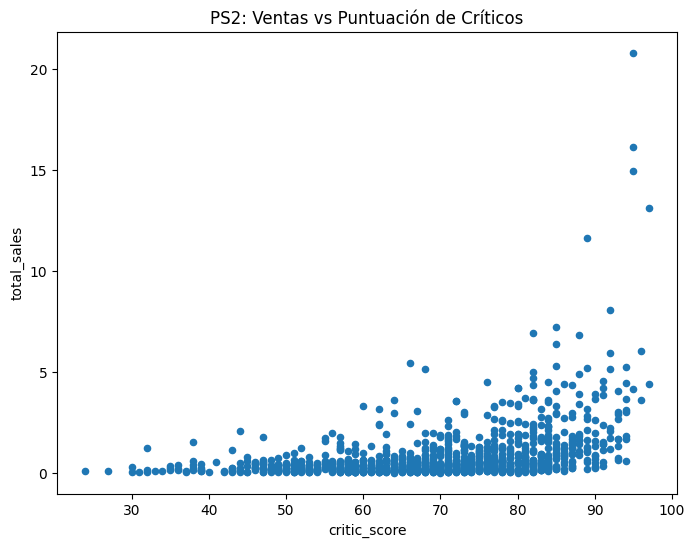

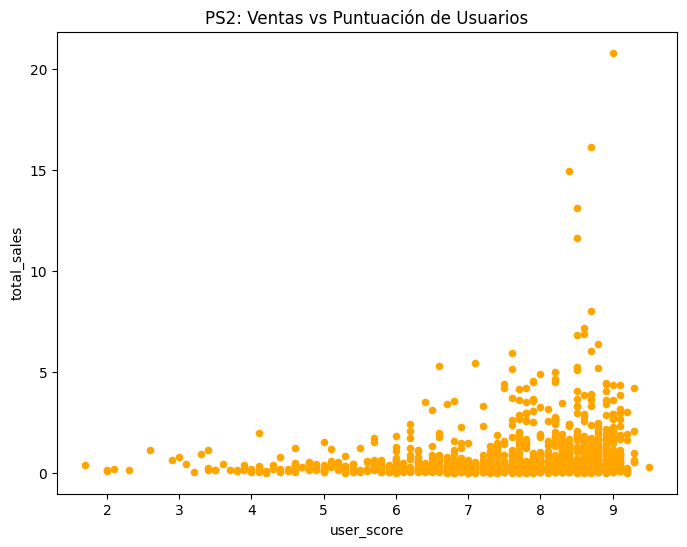

In [21]:
ps2.plot(x='critic_score',y='total_sales',kind='scatter',figsize=[8,6],title='PS2: Ventas vs Puntuación de Críticos')
plt.show()
ps2.plot(x='user_score',y='total_sales',kind='scatter',figsize=[8,6],title='PS2: Ventas vs Puntuación de Usuarios',color='orange')
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

In [22]:
# Correlaciones
corr_critic = ps2['critic_score'].corr(ps2['total_sales'])
corr_user   = ps2['user_score'].corr(ps2['total_sales'])
print(f"Correlación Ventas–Critic Score: {corr_critic:.2f}")
print(f"Correlación Ventas–User Score:   {corr_user:.2f}")

Correlación Ventas–Critic Score: 0.39
Correlación Ventas–User Score:   0.17


La relacion de criticas usuarios y criticos influyen menos con las ventas.

Comparar ventas de esos mismos juegos en otras plataformas

In [23]:
# Lista de títulos PS2 usados en el análisis
ps2_titles = ps2['name'].unique()

# Filtrar en el DataFrame original los mismos títulos, pero en otras plataformas
others = (
    games[games['name'].isin(ps2_titles) & (games['platform'] != 'PS2')]
    .copy())
# Se compara con otras plataformas
comparison = others.pivot_table(
    index='name',
    columns='platform',
    values='total_sales')
comparison['total_sales_other_platform']=comparison[['2600','3DS','DC','DS','GB','GBA','GC','N64','NES','PC','PS','PS3','PS4','PSP','PSV','SNES','Wii','WiiU','X360','XB']].sum(axis=1)
comparison.sort_values('total_sales_other_platform',ascending=False).head(10)

platform,2600,3DS,DC,DS,GB,GBA,GC,N64,NES,PC,...,PS3,PS4,PSP,PSV,SNES,Wii,WiiU,X360,XB,total_sales_other_platform
name,,,,,,,,,,,,,,,,,,,,,
LEGO Batman: The Videogame,NaN,NaN,NaN,3.05,NaN,NaN,NaN,NaN,NaN,0.060,...,1.30,NaN,1.28,NaN,NaN,3.06,NaN,3.380,NaN,12.13
Guitar Hero III: Legends of Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020,...,2.25,NaN,NaN,NaN,NaN,4.58,NaN,4.530,NaN,11.38
LEGO Indiana Jones: The Original Adventures,NaN,NaN,NaN,2.19,NaN,NaN,NaN,NaN,NaN,0.040,...,1.03,NaN,1.17,NaN,NaN,2.33,NaN,3.770,NaN,10.53
Star Wars: The Force Unleashed,NaN,NaN,NaN,0.87,NaN,NaN,NaN,NaN,NaN,NaN,...,2.21,NaN,1.07,NaN,NaN,1.85,NaN,2.770,NaN,8.77
Need for Speed: Most Wanted,NaN,NaN,NaN,0.27,NaN,0.26,0.56,NaN,NaN,0.185,...,2.81,NaN,NaN,1.01,NaN,NaN,0.27,1.405,1.04,7.81
Grand Theft Auto: Liberty City Stories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.68,NaN,NaN,NaN,NaN,NaN,NaN,7.68
Harry Potter and the Sorcerer's Stone,NaN,NaN,NaN,NaN,1.73,1.69,0.08,NaN,NaN,0.060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,7.36
Call of Duty 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.51,NaN,NaN,NaN,NaN,2.24,NaN,2.700,NaN,6.45
FIFA Soccer 09,NaN,NaN,NaN,0.49,NaN,NaN,NaN,NaN,NaN,0.020,...,2.58,NaN,1.35,NaN,NaN,NaN,NaN,1.940,NaN,6.38


En otras plataformas hay buenas ventas de los mismos juegos que en la ps2

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [24]:
# Agrupar por género y calcular suma
genre_stats = (
    games
    .groupby('genre')['total_sales']
    .agg(total_sales='sum')
    .sort_values('total_sales', ascending=False))
top_5=genre_stats.head(5).index
top_5

Index(['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform'], dtype='object', name='genre')

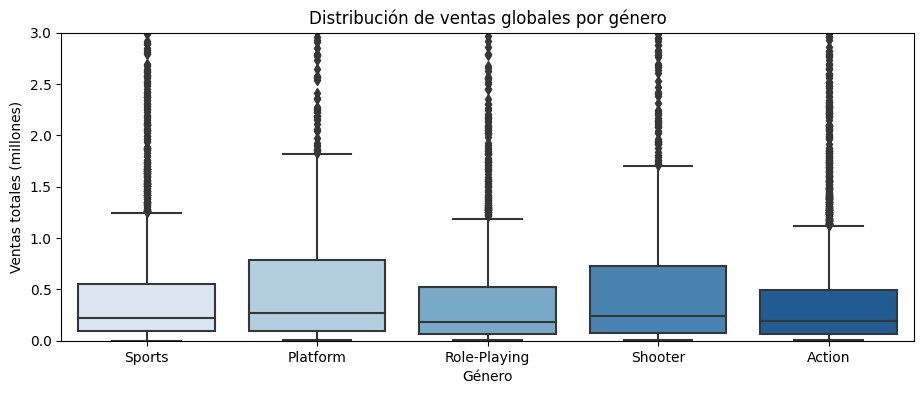

In [25]:

df_top_5 = games[games['genre'].isin(top_5)]

plt.figure(figsize=(11, 4))
sns.boxplot(
    x='genre', 
    y='total_sales', 
    data=df_top_5, 
    palette='Blues'
)
plt.title('Distribución de ventas globales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')
plt.ylim(0, 3) 
plt.show()

Hay datos sesgados el promedio de ventas es bajo en los generos mas rentables. Las ventas bajas tiene casi el mismo valor en los 5 generos y las ventas mas altas son tambien casi la totalidad.

 Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

°Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

°Los cinco géneros principales. Explica la diferencia.

°Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [26]:
# 1) Top 5 Plataformas en NA
top5_na = games.groupby('platform')['na_sales'] \
               .sum() \
               .sort_values(ascending=False) \
               .head(5)
print("Top 5 Plataformas en NA:\n", top5_na)

# Cuota de mercado (%)
total_na = games['na_sales'].sum()
share_na = (top5_na / total_na * 100).round(2)
print("\nCuota de mercado NA (%):\n", share_na)


# 2) Top 5 Géneros en NA
top5_gen_na = games.groupby('genre')['na_sales'] \
                   .sum() \
                   .sort_values(ascending=False) \
                   .head(5)
print("\nTop 5 Géneros en NA:\n", top5_gen_na)


# 3) Ventas por Rating ESRB en NA
rating_na = games.groupby('rating')['na_sales'] \
                 .sum() \
                 .sort_values(ascending=False)
print("\nVentas por Rating en NA:\n", rating_na)


Top 5 Plataformas en NA:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Cuota de mercado NA (%):
 platform
X360    13.69
PS2     13.26
Wii     11.29
PS3      8.94
DS       8.69
Name: na_sales, dtype: float64

Top 5 Géneros en NA:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Ventas por Rating en NA:
 rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64


1. las 3 principales son x360, ps2 y wii con un 13.69 13.26 y 11.29 resptectivamente en porcentaje del mercado de norteamerica y ps3 y ds en 4to y 5to puesto con un porcentaje similar casi 9 porciento.
2. el top 5 de generos mas vendidos en norteamerica son: action, sports, shooter, platform y misca. el top con 879 millones en venta y el menor misco con 407 millones en ventas.
3. No afecta las ventas los raiting los E (todos), T( adolescentes) y M(maduros), son los raiting que venden mas.

In [27]:
# Top 5 Plataformas en JP
top5_jp = games.groupby('platform')['jp_sales'] \
               .sum() \
               .sort_values(ascending=False) \
               .head(5)
print("Top 5 Plataformas en JP:\n", top5_jp)

# Cuota de mercado JP (%)
total_jp = games['jp_sales'].sum()
share_jp = (top5_jp / total_jp * 100).round(2)
print("\nCuota de mercado JP (%):\n", share_jp)

# Top 5 Géneros en JP
top5_gen_jp = games.groupby('genre')['jp_sales'] \
                   .sum() \
                   .sort_values(ascending=False) \
                   .head(5)
print("\nTop 5 Géneros en JP:\n", top5_gen_jp)

# Ventas por Rating ESRB en JP
rating_jp = games.groupby('rating')['jp_sales'] \
                 .sum() \
                 .sort_values(ascending=False)
print("\nVentas por Rating en JP:\n", rating_jp)


Top 5 Plataformas en JP:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

Cuota de mercado JP (%):
 platform
DS      13.53
PS      10.78
PS2     10.73
SNES     8.98
3DS      7.76
Name: jp_sales, dtype: float64

Top 5 Géneros en JP:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

Ventas por Rating en JP:
 rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


1. las 3 principales son DS, PS y PS2 con un 13.53 10.78 y 10.73 resptectivamente en porcentaje del mercado de Japones y SNES y 3DS en 4to y 5to puesto con un porcentaje similar casi 9 porciento.
2. el top 5 de generos mas vendidos en Japon son: Role-Playing, Action, Sports, Platform y misca. el top con 355 millones en venta y el menor misco con 108 millones en ventas.
3. No afecta las ventas los raiting los E (todos), T( adolescentes) y M(maduros), son los raiting que venden mas.

In [28]:
# Top 5 Plataformas en EU
top5_eu = games.groupby('platform')['eu_sales'] \
               .sum() \
               .sort_values(ascending=False) \
               .head(5)
print("Top 5 Plataformas en EU:\n", top5_eu)

# Cuota de mercado EU (%)
total_eu = games['eu_sales'].sum()
share_eu = (top5_eu / total_eu * 100).round(2)
print("\nCuota de mercado EU (%):\n", share_eu)

# Top 5 Géneros en EU
top5_gen_eu = games.groupby('genre')['eu_sales'] \
                   .sum() \
                   .sort_values(ascending=False) \
                   .head(5)
print("\nTop 5 Géneros en EU:\n", top5_gen_eu)

# Ventas por Rating ESRB en EU
rating_eu = games.groupby('rating')['eu_sales'] \
                 .sum() \
                 .sort_values(ascending=False)
print("\nVentas por Rating en EU:\n", rating_eu)


Top 5 Plataformas en EU:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Cuota de mercado EU (%):
 platform
PS2     13.99
PS3     13.62
X360    11.17
Wii     10.81
PS       8.81
Name: eu_sales, dtype: float64

Top 5 Géneros en EU:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Ventas por Rating en EU:
 rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
RP        0.08
Name: eu_sales, dtype: float64


1. las 3 principales son PS2, PS3 y X360 con un 13.99 13.63 y 11.17 resptectivamente en porcentaje del mercado de Europeo, Wii y PS en 4to y 5to puesto con un porcentaje 10.81 y 8.81 en el mercado.
2. el top 5 de generos mas vendidos en Europa son: Action, Sports, shooter , Racing y misc. el top con 519 millones en venta y el menor misco con 212 millones en ventas.
3. No afecta las ventas los raiting los E(todos), M(maduros) y T( adolescentes)  son los raiting que venden mas.

Conclusiones generales:

1 América del Norte está dominada por la X360 y PS2, con cuotas muy parejas (13.7 % vs 13.3 %).

Europa prefiere las consolas Sony (PS2/PS3 suman ~27 %), mientras que la X360 y Wii rondan cada una el 11 %.

Japón : el DS lidera (13.5 %), seguido de cerca por la PlayStation original y PS2. Consolas de Nintendo de sobremesa clásicas (SNES) y portátiles modernas (3DS) también entran en el top 5.

2 Action y Sports son los dos géneros más fuertes en NA y EU, con Shooter en tercer lugar.

EU incluye Racing como 4º, mientras que NA prefiere Platform.

JP rompe el patrón: los Role‑Playing (JRPGs) encabezan el mercado, relegando a Shooter al puesto 6.

3 En NA y EU, los juegos E (Todos) representan casi la mitad de las ventas, pero los títulos M (Maduro) también tienen un peso muy alto (28–31 %).

En JP, aunque E sigue primero (42 %), los juegos M caen drásticamente (14 %) y E10+/T ganan algo de terreno en comparación.

Ratings minoritarios (AO, EC, RP) prácticamente no aportan ventas en ninguna región.

Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [29]:
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

xone = games[games['platform']=='XOne']['user_score'].dropna()
pc   = games[games['platform']=='PC'  ]['user_score'].dropna()

action = games[games['genre']=='Action']['user_score'].dropna()
sports = games[games['genre']=='Sports']['user_score'].dropna()

alpha = 0.05  # el nivel de significancia estadística crítica
levene_test_x_pc = stats.levene(xone, pc)
equal_var_x_pc= levene_test_x_pc.pvalue > 0.05
results = st.ttest_ind(
    xone, pc, equal_var=equal_var_x_pc
)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 1.3896435533548819e-05
Rechazamos la hipótesis nula


In [30]:
alpha = 0.05  # el nivel de significancia estadística crítica
levene_test_action_sports = stats.levene(action, sports)
equal_var_action_sports= levene_test_action_sports.pvalue > 0.05
results = st.ttest_ind(
    action, sports, equal_var=equal_var_action_sports
)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.11483818791498286
No podemos rechazar la hipótesis nula


Ya agrege la pruebas levene en ambos casos previamente para saber si las varianzas son iguales y agregarlo dentro de la funcion.

 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xone, pc)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo con el ajuste!

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Christian, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados.